Load data from URL, and saving it locally as fileName.

In [1]:
# Load Data from URL
import urllib.request
# sample data file from beeradvocate
fileName = "sample_data/beeradvocate.json.gz"
# BeerAdvocate Data
urllib.request.urlretrieve("https://datarepo.eng.ucsd.edu/mcauley_group/data/beer/beeradvocate.json.gz", fileName)


('sample_data/beeradvocate.json.gz',
 <http.client.HTTPMessage at 0x7ac006a08730>)

Unzip the compressed file from ".gz" to uncompressed file as "beeradvocate.json", using shutil lib , the steps is done in binary mode
Definition: rb = "read binary", file opened in binary mode
             wb = "write binary", file opened in binary mode

In [2]:
import gzip
import shutil

with gzip.open('sample_data/beeradvocate.json.gz', 'rb') as file_in:
    with open('beeradvocate.json', 'wb') as file_out:
        shutil.copyfileobj(file_in, file_out)
        print(file_in)
        print(file_out)

<gzip _io.BufferedReader name='sample_data/beeradvocate.json.gz' 0x7ac006a08280>
<_io.BufferedWriter name='beeradvocate.json'>


Shows a sample of the first and last 10 extracted user reviews (to show the previous steps also successful.

In [3]:
!head -10 beeradvocate.json
!tail -10 beeradvocate.json

{'beer/name': 'Sausa Weizen', 'beer/beerId': '47986', 'beer/brewerId': '10325', 'beer/ABV': '5.00', 'beer/style': 'Hefeweizen', 'review/appearance': '2.5', 'review/aroma': '2', 'review/palate': '1.5', 'review/taste': '1.5', 'review/overall': '1.5', 'review/time': '1234817823', 'review/profileName': 'stcules', 'review/text': 'A lot of foam. But a lot.\tIn the smell some banana, and then lactic and tart. Not a good start.\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\tAgain tending to lactic sourness.\tSame for the taste. With some yeast and banana.'}
{'beer/name': 'Red Moon', 'beer/beerId': '48213', 'beer/brewerId': '10325', 'beer/ABV': '6.20', 'beer/style': 'English Strong Ale', 'review/appearance': '3', 'review/aroma': '2.5', 'review/palate': '3', 'review/taste': '3', 'review/overall': '3', 'review/time': '1235915097', 'review/profileName': 'stcules', 'review/text': 'Dark red color, light beige foam, average.\tIn the smell malt and caramel, not 

Loading the data into a Dask Dataframe file "beeradvocate.json" using Dask Bag, splitting it into partitions of approximately 1MB each, and prints information about the result to show its dask.bag.    
npartitions = showing the number of partitions that the Dask collection is divided into.

In [4]:
from dask import bag as db

data_bag = db.read_text('beeradvocate.json', blocksize="1MB")
print(data_bag)

dask.bag<bag-from-delayed, npartitions=1655>


Print new line , else it will be all in one line, for all 10.
Also print only the 9th line

In [5]:
first_data = data_bag.take(5)
print(first_data)
print("\n".join(first_data))
print("\n", end="")
print(first_data[4])

("{'beer/name': 'Sausa Weizen', 'beer/beerId': '47986', 'beer/brewerId': '10325', 'beer/ABV': '5.00', 'beer/style': 'Hefeweizen', 'review/appearance': '2.5', 'review/aroma': '2', 'review/palate': '1.5', 'review/taste': '1.5', 'review/overall': '1.5', 'review/time': '1234817823', 'review/profileName': 'stcules', 'review/text': 'A lot of foam. But a lot.\\tIn the smell some banana, and then lactic and tart. Not a good start.\\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\\tAgain tending to lactic sourness.\\tSame for the taste. With some yeast and banana.'}\n", "{'beer/name': 'Red Moon', 'beer/beerId': '48213', 'beer/brewerId': '10325', 'beer/ABV': '6.20', 'beer/style': 'English Strong Ale', 'review/appearance': '3', 'review/aroma': '2.5', 'review/palate': '3', 'review/taste': '3', 'review/overall': '3', 'review/time': '1235915097', 'review/profileName': 'stcules', 'review/text': 'Dark red color, light beige foam, average.\\tIn the smell malt and c

Read the file "beeradvocate.json", replacing single quotes with double quotes in each line, converts the JSON data into a new file named "beeradvocate.jsonlines" using the JSONLines format.  
Note - Invalid line is ignore (such as missing comma, etc)

In [6]:
!pip install jsonlines
import jsonlines
import json
with open('beeradvocate.json', 'r') as input_file:
    with jsonlines.open("beeradvocate.jsonlines", "w") as output_file:
        for line in input_file:
            try:
                line = line.replace("'", '"')
                data = json.loads(line)
                output_file.write(data)
            except json.JSONDecodeError:
                continue

Print the first and last 10 lines to see if previous step was successful.

In [7]:
!head -10 'beeradvocate.jsonlines'
!tail -10 'beeradvocate.jsonlines'

{"beer/name": "Sausa Weizen", "beer/beerId": "47986", "beer/brewerId": "10325", "beer/ABV": "5.00", "beer/style": "Hefeweizen", "review/appearance": "2.5", "review/aroma": "2", "review/palate": "1.5", "review/taste": "1.5", "review/overall": "1.5", "review/time": "1234817823", "review/profileName": "stcules", "review/text": "A lot of foam. But a lot.\tIn the smell some banana, and then lactic and tart. Not a good start.\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\tAgain tending to lactic sourness.\tSame for the taste. With some yeast and banana."}
{"beer/name": "Red Moon", "beer/beerId": "48213", "beer/brewerId": "10325", "beer/ABV": "6.20", "beer/style": "English Strong Ale", "review/appearance": "3", "review/aroma": "2.5", "review/palate": "3", "review/taste": "3", "review/overall": "3", "review/time": "1235915097", "review/profileName": "stcules", "review/text": "Dark red color, light beige foam, average.\tIn the smell malt and caramel, not 

Count the numer of lines before and after conversion from json to jsonlines.  
Since invalid data (lines) are ignored there will be some missing data.  
Note -Since data are ignored is invalid and random ( the rest of data should be still usable for the project as theres no (hand picked) data).

In [8]:
with open('beeradvocate.json', 'r') as input_file:
    with jsonlines.open("beeradvocate.jsonlines", "r") as output_file:
        try:
            count = 0
            for line in input_file:
                count += 1
            countl = 0
            for line in output_file:
              countl +=1
            print(count,countl)
        except json.JSONDecodeError:
            pass

1586615 589528


Make a dask data_bag from the jsonlines, splitting it into partition of blocksize.

In [9]:
import dask
from dask import bag as db

data_bag = db.read_text('beeradvocate.jsonlines', blocksize="1MB")
print(data_bag)

dask.bag<bag-from-delayed, npartitions=534>


Creating a random sample of lines from the file "beeradvocate.jsonlines" and writes them to a new file named "sample_data.jsonl".  
The random is done by using the python random library and shuffling the lines and selecting the lines upto the sample size.

In [10]:
import json
import random

sample_size = 10000

input_json_lines_file = 'beeradvocate.jsonlines'
output_file = 'sample_data.jsonl'

def create_sample(input_file, output_file, sample_size):
   with open(input_file, 'r') as read_file, open(output_file, 'w') as output:
       lines = read_file.readlines()
       random.shuffle(lines)
       for line in lines[:sample_size]:
           output.write(line)

create_sample(input_json_lines_file, output_file, sample_size)

Make a dask data_bag from the sample_data jsonlines, splitting it into partition of blocksize.

In [11]:
import dask
from dask import bag as db

data_bag = db.read_text('sample_data.jsonl', blocksize="1MB")
print(data_bag)

dask.bag<bag-from-delayed, npartitions=9>


extract_beer_style_and_rating(json_string): extracts attributes such as beer style, appearance, aroma, palate, and taste ratings, and returns them as a tuple.
beer_style_vectors(text_file_bag): Takes the beeradvocate(data_bag) as input, than maps beer/style and the ratining attributes by calling the function extract_beer_style_and_rating. Then group by beer/style (distinct). Finally maps the mean of the review for each beer style.

In [12]:
import numpy as np

def extract_beer_style_and_rating(json_string):
    data = json.loads(json_string)
    beer_style = data.get("beer/style")
    # overall_rating = float(data.get("review/overall", 0))
    appearance = float(data.get("review/appearance", 0))
    aroma = float(data.get("review/aroma", 0))
    palate = float(data.get("review/palate", 0))
    taste = float(data.get("review/taste", 0))

    return (beer_style, appearance, aroma, palate, taste)

def beer_style_vectors(text_file_bag):

    beer_styles_and_ratings = text_file_bag.map(extract_beer_style_and_rating)
    grouped_by_style = beer_styles_and_ratings.groupby(lambda x: x[0])
    mean_vectors = grouped_by_style.map(lambda style_group: (style_group[0], np.mean([np.array(entry[1:]) for entry in style_group[1]], axis=0)))

    return (mean_vectors)

style_vectors = beer_style_vectors(data_bag)
for style, vector in style_vectors:
    print(f"Beer Style: {style}, Mean Vector: {vector}")

Beer Style: English Porter, Mean Vector: [3.91304348 3.86231884 3.79710145 3.98550725]
Beer Style: American Double / Imperial IPA, Mean Vector: [4.10784314 4.11873638 4.0130719  4.10130719]
Beer Style: Witbier, Mean Vector: [3.72164948 3.66752577 3.62371134 3.69072165]
Beer Style: Keller Bier / Zwickel Bier, Mean Vector: [3.83333333 3.5        3.74074074 3.75925926]
Beer Style: Belgian Dark Ale, Mean Vector: [3.85714286 3.6875     3.65178571 3.72321429]
Beer Style: Berliner Weissbier, Mean Vector: [3.64705882 3.38235294 3.88235294 3.67647059]
Beer Style: Lambic - Unblended, Mean Vector: [3.79166667 4.25       3.91666667 4.20833333]
Beer Style: California Common / Steam Beer, Mean Vector: [3.7        3.61428571 3.67142857 3.68571429]
Beer Style: Bière de Champagne / Bière Brut, Mean Vector: [4.25 3.5  4.25 4.25]
Beer Style: American Brown Ale, Mean Vector: [3.84662577 3.71779141 3.73312883 3.82208589]
Beer Style: Scottish Ale, Mean Vector: [3.76623377 3.62337662 3.66883117 3.73376623]
B

cosine_similarity: lab 4
Make a combination so that the alg can calculate beer/style ( against all the other beer style), than group by beer/style so the repeated beer style is collapsed.Finally sort the items by the cosine simalirity and then get the top 5 similar beer style.

In [13]:
import dask.array as da
import numpy as np
import math

def cosine_similarity(u, v):

    dot_product = (u * v).sum()
    norm_u = math.sqrt((u * u).sum())
    norm_v = math.sqrt((v * v).sum())
    similarity = dot_product / (norm_u * norm_v)

    return similarity

def calculate_cosine_similarity(style_vectors):

    combinations = style_vectors.product(style_vectors).filter(lambda x: x[0][0] != x[1][0])
    similarities = combinations.map(lambda x: (x[0][0], x[1][0], cosine_similarity(x[0][1], x[1][1])))
    grouped_similarities = similarities.groupby(lambda x: x[0])
    top_5_per_style = grouped_similarities.map(lambda x: sorted(list(x[1]), key=lambda y: y[2], reverse=True)[:5])

    return top_5_per_style

similarities = calculate_cosine_similarity(style_vectors)

for items in similarities:
    for style1, style2, similarity in items:
        print(f"Beer Style: {style1} similar to: {style2}: {similarity}")


Beer Style: American Double / Imperial Stout similar to: Rauchbier: 0.9999954701566232
Beer Style: American Double / Imperial Stout similar to: Belgian Strong Dark Ale: 0.9999897554881713
Beer Style: American Double / Imperial Stout similar to: Tripel: 0.9999895451981177
Beer Style: American Double / Imperial Stout similar to: American Double / Imperial IPA: 0.9999858213322719
Beer Style: American Double / Imperial Stout similar to: Witbier: 0.9999804856266226
Beer Style: Bock similar to: Märzen / Oktoberfest: 0.9999812179897904
Beer Style: Bock similar to: Schwarzbier: 0.9999769007406905
Beer Style: Bock similar to: Dortmunder / Export Lager: 0.99996852108814
Beer Style: Bock similar to: German Pilsener: 0.9999680149952088
Beer Style: Bock similar to: Scottish Ale: 0.9999615914511354
Beer Style: Happoshu similar to: Euro Strong Lager: 0.999065646087012
Beer Style: Happoshu similar to: Vienna Lager: 0.9985122144410441
Beer Style: Happoshu similar to: Gose: 0.9984524887091747
Beer Style

#download a set of stop words that we can ignore because they are not interesting

Stop words (ignore simple words eg (the,a,i,am etc)) from sample code.

In [14]:
!pip install nltk

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

STOP_WORDS = set(stopwords.words('english'))
print(STOP_WORDS)


{'this', 'needn', 'hasn', 'the', 're', 't', "needn't", 'most', 'nor', "wasn't", 'up', 'no', "weren't", "hadn't", "isn't", 'them', 'these', 'had', 'our', 'each', 'can', 'she', 'yourself', 'whom', 'in', 'don', 've', 'with', 'into', 'being', "you've", 'own', 'they', 'any', 'but', "aren't", 'are', 'be', 'did', "don't", 'so', 'between', 'such', "won't", 'if', 'didn', 'i', 'further', 'about', "mustn't", 'some', 'couldn', 'before', 'again', 'y', 'is', "doesn't", 'itself', 'weren', 'what', 'at', "couldn't", "didn't", 'hadn', 'or', 'wouldn', 'we', 'an', 'above', 'doesn', 'under', "that'll", 'has', 'he', 'do', 'those', "shan't", "it's", 'while', 'wasn', 'because', 'you', "shouldn't", 'by', 'hers', 's', 'just', 'herself', 'once', "mightn't", 'where', "you'll", 'then', 'her', 'both', 'mustn', 'was', 'on', 'his', 'until', 'all', 'having', 'haven', 'shouldn', "hasn't", 'o', 'shan', "you're", 'of', 'theirs', 'himself', 'myself', 'same', 'its', 'which', 'me', 'should', 'ours', 'only', 'who', 'aren', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



#A prior


Top most freq words, (not sorted) by beer/style

In [15]:
import json
import dask.bag as db

def extract_beer_style_and_rating(json_string):
    data = json.loads(json_string)
    beer_style = data.get("beer/style", "")
    taste = data.get("review/text", "")
    return beer_style, taste

def stop_words(text):

    words = text.lower().split()
    filtered_words = [word for word in words if word not in STOP_WORDS and word.isalpha()]
    return filtered_words

def a_priori_step1(text_file_bag):

    words = text_file_bag.map(stop_words)
    flat_words = words.flatten()
    word_frequencies = flat_words.frequencies()
    return word_frequencies

def beer_style_words(text_file_bag):

    beer_styles_and_ratings = text_file_bag.map(extract_beer_style_and_rating)
    grouped_by_style = beer_styles_and_ratings.groupby(lambda x: x[0])
    concatenated_reviews = grouped_by_style.map(lambda style_group: (style_group[0], '\n'.join([entry[1] for entry in style_group[1]])))
    word_frequencies = concatenated_reviews.map(lambda kv: (kv[0], a_priori_step1(db.from_sequence([kv[1]]))))
    top_10_words = word_frequencies.map(lambda kv: (kv[0], kv[1].topk(10, key=lambda x: x[1])))

    return top_10_words

styles_frequencies = beer_style_words(data_bag)

for style, frequencies in styles_frequencies:
    print(f"Beer Style: {style}")
    print(f"Word Frequencies: {frequencies.compute()}")


Beer Style: English Porter
Word Frequencies: [('dark', 54), ('beer', 48), ('head', 42), ('coffee', 40), ('chocolate', 39), ('roasted', 38), ('light', 38), ('nice', 37), ('brown', 37), ('good', 33)]
Beer Style: American Double / Imperial IPA
Word Frequencies: [('hops', 328), ('hop', 324), ('nice', 322), ('good', 268), ('head', 261), ('beer', 258), ('citrus', 244), ('malt', 240), ('sweet', 230), ('taste', 203)]
Beer Style: Witbier
Word Frequencies: [('light', 142), ('beer', 128), ('head', 112), ('taste', 106), ('white', 106), ('nice', 101), ('good', 85), ('orange', 84), ('citrus', 84), ('like', 80)]
Beer Style: Keller Bier / Zwickel Bier
Word Frequencies: [('beer', 18), ('nice', 16), ('white', 16), ('sweet', 16), ('head', 15), ('light', 14), ('taste', 13), ('bit', 12), ('hop', 12), ('hops', 11)]
Beer Style: Belgian Dark Ale
Word Frequencies: [('dark', 54), ('light', 34), ('brown', 30), ('head', 29), ('taste', 29), ('good', 27), ('nice', 25), ('sweet', 25), ('beer', 23), ('bit', 22)]
Beer

For certain beer style , see the most similar beer style, and words that frequently appears.

In [16]:
target_beer_style = "Scottish Ale"
similar_beer_styles = {}

for items in similarities:
    for style1, style2, similarity in items:
        if style1 == target_beer_style and (style2, similarity) not in similar_beer_styles.get(style1, []):
            similar_beer_styles.setdefault(style1, []).append((style2, similarity))
        if style2 == target_beer_style and (style1, similarity) not in similar_beer_styles.get(style2, []):
            similar_beer_styles.setdefault(style2, []).append((style1, similarity))

for style, similar_beers in similar_beer_styles.items():
    print("*" * 100 )
    print(f"Beer Style: {style}")
    print("*" * 100 )
    print(f"Similar to:")
    print("*" * 100 )
    for beer, similarity in similar_beers:
        print(f"{beer}: {similarity}", end='\n')
        print("_" * 100 )
    print()

for style, frequencies in styles_frequencies:
    if style in target_beer_style:
        print("*" * 150 )
        print(f"Beer Style: {style}\n")
        freq_string = ", ".join([f"{word}: {freq}" for word, freq in frequencies.compute()])
        print(freq_string)
        print("*" * 150 )
beer = []
for style in similar_beer_styles.items():
  for i,j in style[1]:
    beer.append(i)

for style, frequencies in styles_frequencies:
    if style in beer:
        # print("*" * 150 )
        print(f"Beer Style: {style}\n")
        freq_string = ", ".join([f"{word}: {freq}" for word, freq in frequencies.compute()])
        print(freq_string)
        print("_" * 150 )


****************************************************************************************************
Beer Style: Scottish Ale
****************************************************************************************************
Similar to:
****************************************************************************************************
Bock: 0.9999615914511354
____________________________________________________________________________________________________
Baltic Porter: 0.9999862296084235
____________________________________________________________________________________________________
American Brown Ale: 0.9999953729537925
____________________________________________________________________________________________________
Russian Imperial Stout: 0.9999945576696488
____________________________________________________________________________________________________
American Blonde Ale: 0.9999927679580194
___________________________________________________________________________

In [17]:
sample_size = 500000

input_json_lines_file = 'beeradvocate.jsonlines'
output_file = 'sample_data.jsonl'

def create_sample(input_file, output_file, sample_size):
   with open(input_file, 'r') as read_file, open(output_file, 'w') as output:
       lines = read_file.readlines()
       random.shuffle(lines)
       for line in lines[:sample_size]:
           output.write(line)

create_sample(input_json_lines_file, output_file, sample_size)

data_bag = db.read_text('sample_data.jsonl', blocksize="1MB")
print(data_bag)

dask.bag<bag-from-delayed, npartitions=453>


In [18]:
import math
import time

def extract_beer_style_and_rating(json_string):
    data = json.loads(json_string)
    beer_style = data.get("beer/style")
    # overall_rating = float(data.get("review/overall", 0))
    appearance = float(data.get("review/appearance", 0))
    aroma = float(data.get("review/aroma", 0))
    palate = float(data.get("review/palate", 0))
    taste = float(data.get("review/taste", 0))

    return (beer_style, appearance, aroma, palate, taste)

def beer_style_vectors(text_file_bag):

    beer_styles_and_ratings = text_file_bag.map(extract_beer_style_and_rating)
    grouped_by_style = beer_styles_and_ratings.groupby(lambda x: x[0])
    mean_vectors = grouped_by_style.map(lambda style_group: (style_group[0], np.mean([np.array(entry[1:]) for entry in style_group[1]], axis=0)))

    return (mean_vectors)

style_vectors = beer_style_vectors(data_bag)

def cosine_similarity(u, v):
    dot_product = (u * v).sum()
    norm_u = math.sqrt((u * u).sum())
    norm_v = math.sqrt((v * v).sum())
    similarity = dot_product / (norm_u * norm_v)
    return similarity

def calculate_cosine_similarity(style_vectors):
    combinations = style_vectors.product(style_vectors).filter(lambda x: x[0][0] != x[1][0])
    similarities = combinations.map(lambda x: (x[0][0], x[1][0], cosine_similarity(x[0][1], x[1][1])))
    grouped_similarities = similarities.groupby(lambda x: x[0])
    top_5_per_style = grouped_similarities.map(lambda x: sorted(list(x[1]), key=lambda y: y[2], reverse=True)[:5])

    return top_5_per_style

start_time = time.time()
similarities = calculate_cosine_similarity(style_vectors)
calculate_cosine_similarity_total_time = time.time() - start_time

print("Time taken to calculate_cosine_similarity:", calculate_cosine_similarity_total_time, "seconds")

Time taken to calculate_cosine_similarity: 5.011731386184692 seconds


In [19]:
import json
import dask.bag as db
import time

def extract_beer_style_and_rating(json_string):
    data = json.loads(json_string)
    beer_style = data.get("beer/style")
    taste = data.get("review/text")
    return beer_style, taste

def stop_words(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in STOP_WORDS and word.isalpha()]
    return filtered_words

def a_priori_step1(text_file_bag):
    words = text_file_bag.map(stop_words)
    flat_words = words.flatten()
    word_frequencies = flat_words.frequencies()
    return word_frequencies

def beer_style_words(text_file_bag):
    beer_styles_and_ratings = text_file_bag.map(extract_beer_style_and_rating)
    grouped_by_style = beer_styles_and_ratings.groupby(lambda x: x[0])
    concatenated_reviews = grouped_by_style.map(lambda style_group: (style_group[0], '\n'.join([entry[1] for entry in style_group[1]])))
    word_frequencies = concatenated_reviews.map(lambda kv: (kv[0], a_priori_step1(db.from_sequence([kv[1]]))))
    top_10_words = word_frequencies.map(lambda kv: (kv[0], kv[1].topk(10, key=lambda x: x[1])))
    return top_10_words

start_time = time.time()
styles_frequencies = beer_style_words(data_bag)
beer_style_words_total_time = time.time() - start_time

print("Time taken to run beer_style_words:", beer_style_words_total_time, "seconds")


Time taken to run beer_style_words: 0.014104604721069336 seconds


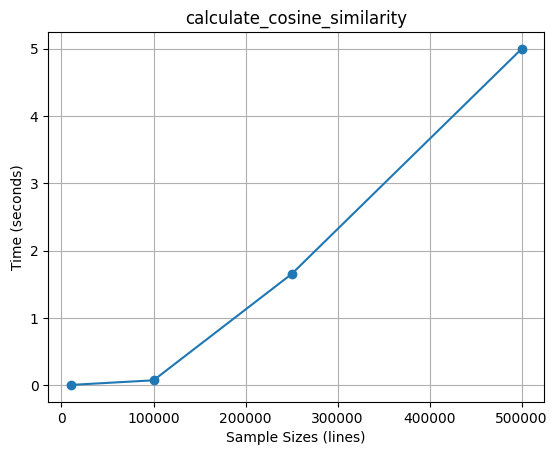

In [20]:
import matplotlib.pyplot as plt

sample_sizes = [10000, 100000, 250000, 500000]
cosine_times = [ 0.002184152603149414, 0.0707845687866211, 1.65000581741333 , 4.997363090515137]

plt.plot(sample_sizes, cosine_times, marker='o')
plt.xlabel('Sample Sizes (lines)')
plt.ylabel('Time (seconds)')
plt.title('calculate_cosine_similarity')
plt.grid(True)
plt.show()


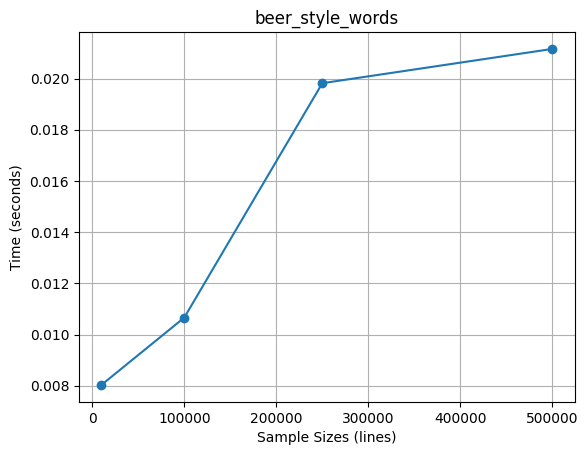

In [21]:
sample_sizes = [10000, 100000, 250000, 500000]
cosine_times = [0.008031368255615234, 0.010660648345947266 , 0.01981806755065918, 0.021157264709472656]

plt.plot(sample_sizes, cosine_times, marker='o')
plt.xlabel('Sample Sizes (lines)')
plt.ylabel('Time (seconds)')
plt.title('beer_style_words')
plt.grid(True)
plt.show()